## Apply the scikit learn adaboost classifier code to the iris dataset using all three categories and all four feature at once and upload your .ipynb file. Use a Decision Tree Classifier at your base classifier. Try using decision trees of varying depths for the base classifier.
## Compare your results with those you obtained last week when you used the Scikit Decision Tree Classifier code to the Iris dataset using all three categories and all four features at once.

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets

# Loading the IRIS dataset
iris = datasets.load_iris()
y = iris.target
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

### DecisionTree Entropy from Last Week

Max Depth, Training, Test
1 0.304761904762 0.4
2 0.0380952380952 0.0888888888889
3 0.0190476190476 0.0222222222222
4 0.0 0.0222222222222
5 0.0 0.0222222222222


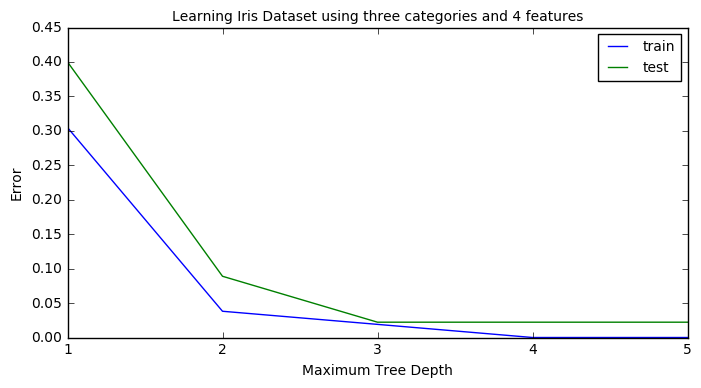

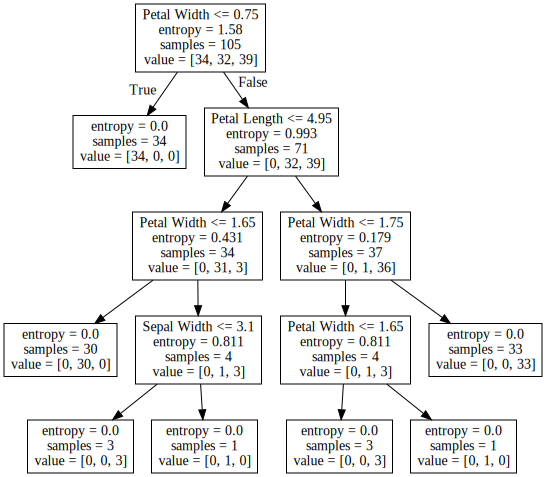

In [21]:
X = iris.data[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MaxDepth = 5
Errors = np.zeros((MaxDepth, 2))
print ('Max Depth, Training, Test')

dt_entropy_record = []

for i in range(0, MaxDepth):    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])
    dt_entropy_record.append([i+1, "Decision Tree with Entropy",Errors[i,0], Errors[i,1]])

# plot errors by tree depth     
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# plot the final decision gree
export_graphviz(tree, out_file='decision_tree_entropy.dot', feature_names=features)
with open('decision_tree_entropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [23]:
dt_entropy_record

[[0, 'Decision Tree with Entropy', 0.30476190476190479, 0.40000000000000002],
 [1, 'Decision Tree with Entropy', 0.038095238095238071, 0.088888888888888906],
 [2, 'Decision Tree with Entropy', 0.019047619047619091, 0.022222222222222254],
 [3, 'Decision Tree with Entropy', 0.0, 0.022222222222222254],
 [4, 'Decision Tree with Entropy', 0.0, 0.022222222222222254]]

### DecisionTree Gini Impurity from Last Week

Max Depth, Training, Test
1 0.304761904762 0.4
2 0.0380952380952 0.0888888888889
3 0.0190476190476 0.0222222222222
4 0.0 0.0222222222222
5 0.0 0.0222222222222


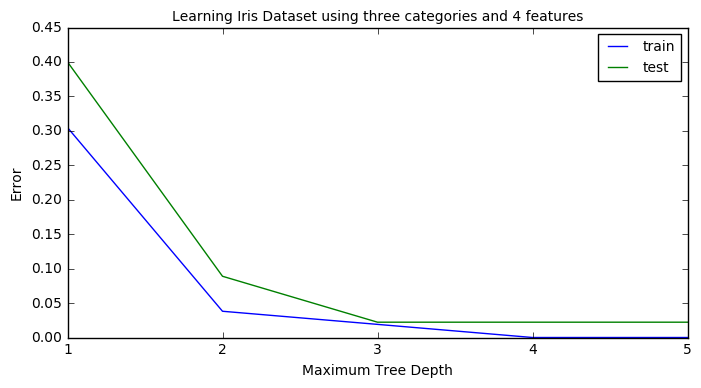

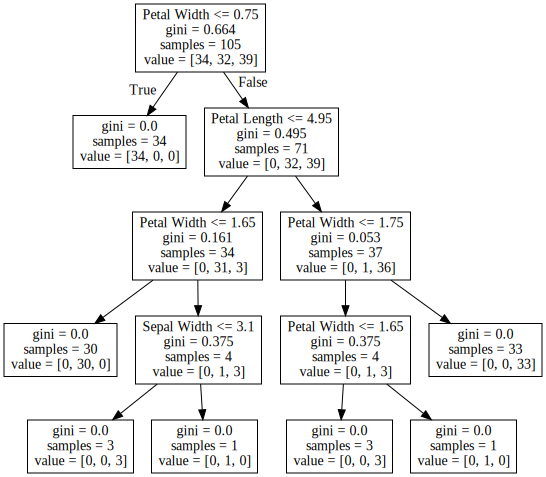

In [24]:
MaxDepth = 5
Errors = np.zeros((MaxDepth, 2))
print ('Max Depth, Training, Test')

dt_gini_record = []

for i in range(0, MaxDepth):    
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])
    dt_gini_record.append([i+1, "Decision Tree with Gini",Errors[i,0], Errors[i,1]])

    
# plot errors by tree depth     
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# plot the final decision gree
export_graphviz(tree, out_file='decision_tree_gini.dot', feature_names=features)
with open('decision_tree_gini.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [25]:
dt_gini_record

[[0, 'Decision Tree with Gini', 0.30476190476190479, 0.40000000000000002],
 [1, 'Decision Tree with Gini', 0.038095238095238071, 0.088888888888888906],
 [2, 'Decision Tree with Gini', 0.019047619047619091, 0.022222222222222254],
 [3, 'Decision Tree with Gini', 0.0, 0.022222222222222254],
 [4, 'Decision Tree with Gini', 0.0, 0.022222222222222254]]

### Adaboost DecisionTree base estimator with Entropy Impurity 

Max Depth, Training, Test
1 0.0380952380952 0.0888888888889
2 0.0 0.133333333333
3 0.0 0.0222222222222
4 0.0 0.0222222222222
5 0.0 0.0222222222222


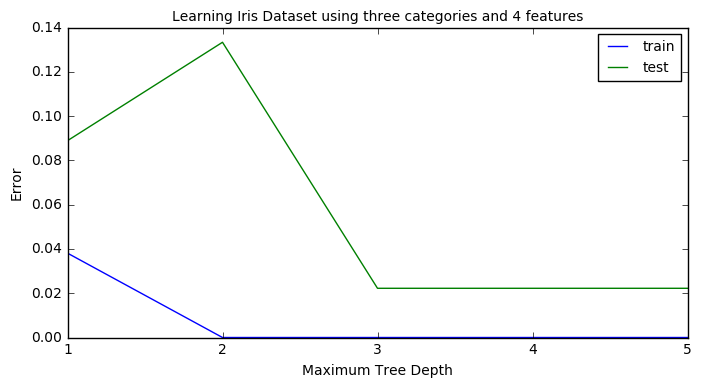

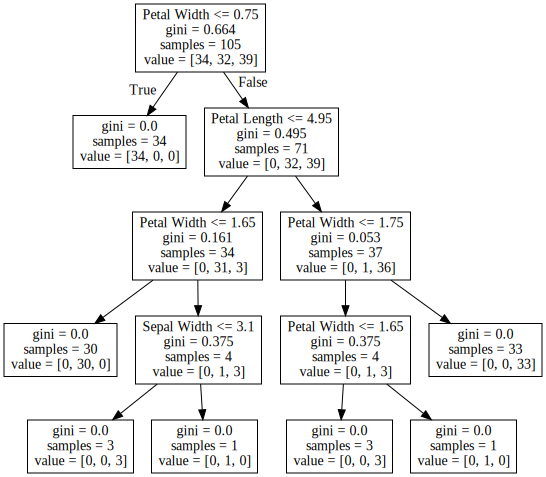

In [28]:
X = iris.data[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MaxDepth = 5
Errors = np.zeros((MaxDepth, 2))
print ('Max Depth, Training, Test')

adaboost_entropy_record = []

for i in range(0, MaxDepth):  
    adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0))
#     tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    adaboost.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # optional outputs
#     z = adaboost.apply(X_combined)
    #print(z)
#     dp = adaboost.decision_path(X_combined)
    #print (dp)
      
    
    Errors[i,0] = 1 - adaboost.score(X_train,y_train)
    Errors[i,1] = 1 - adaboost.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])
    adaboost_entropy_record.append([i+1, "Adaboost with Entropy",Errors[i,0], Errors[i,1]])

# plot errors by tree depth     
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# plot the final decision gree
export_graphviz(tree, out_file='adaboost_entropy.dot', feature_names=features)
with open('adaboost_entropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [29]:
adaboost_entropy_record

[[0, 'Adaboost with Entropy', 0.038095238095238071, 0.088888888888888906],
 [1, 'Adaboost with Entropy', 0.0, 0.1333333333333333],
 [2, 'Adaboost with Entropy', 0.0, 0.022222222222222254],
 [3, 'Adaboost with Entropy', 0.0, 0.022222222222222254],
 [4, 'Adaboost with Entropy', 0.0, 0.022222222222222254]]

### Adaboost DecisionTree base estimator with Gini Impurity

Max Depth, Training, Test
1 0.0380952380952 0.0888888888889
2 0.0 0.133333333333
3 0.0 0.0222222222222
4 0.0 0.0222222222222
5 0.0 0.0222222222222


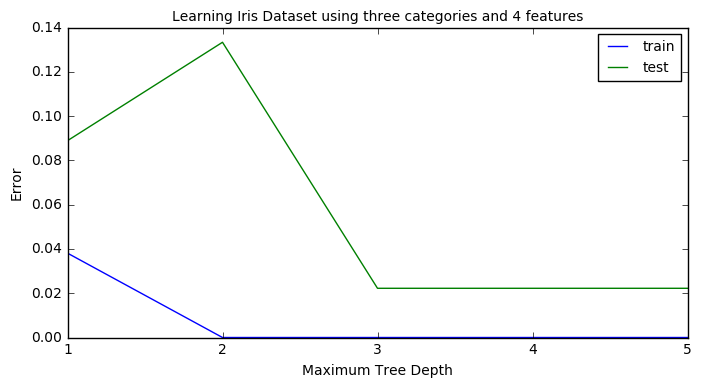

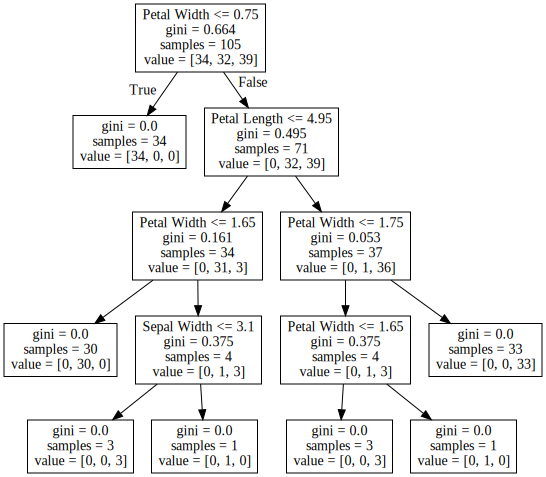

In [30]:
X = iris.data[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MaxDepth = 5
Errors = np.zeros((MaxDepth, 2))
print ('Max Depth, Training, Test')

adaboost_gini_record = []

for i in range(0, MaxDepth):  
    adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0))
#     tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    adaboost.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # optional outputs
#     z = adaboost.apply(X_combined)
    #print(z)
#     dp = adaboost.decision_path(X_combined)
    #print (dp)
      
    
    Errors[i,0] = 1 - adaboost.score(X_train,y_train)
    Errors[i,1] = 1 - adaboost.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])
    adaboost_gini_record.append([i+1, "Adaboost with Gini",Errors[i,0], Errors[i,1]])
    
# plot errors by tree depth     
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# plot the final decision gree
export_graphviz(tree, out_file='adaboost_gini.dot', feature_names=features)
with open('adaboost_gini.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [31]:
adaboost_gini_record

[[0, 'Adaboost with Gini', 0.038095238095238071, 0.088888888888888906],
 [1, 'Adaboost with Gini', 0.0, 0.1333333333333333],
 [2, 'Adaboost with Gini', 0.0, 0.022222222222222254],
 [3, 'Adaboost with Gini', 0.0, 0.022222222222222254],
 [4, 'Adaboost with Gini', 0.0, 0.022222222222222254]]

In [32]:
from tabulate import tabulate

result_record = dt_entropy_record + dt_gini_record + adaboost_entropy_record + adaboost_gini_record
print(tabulate(result_record, headers=["Max Depth", "Method", "Training Error",  "Test Error"]))

  Max Depth  Method                        Training Error    Test Error
-----------  --------------------------  ----------------  ------------
          0  Decision Tree with Entropy         0.304762      0.4
          1  Decision Tree with Entropy         0.0380952     0.0888889
          2  Decision Tree with Entropy         0.0190476     0.0222222
          3  Decision Tree with Entropy         0             0.0222222
          4  Decision Tree with Entropy         0             0.0222222
          0  Decision Tree with Gini            0.304762      0.4
          1  Decision Tree with Gini            0.0380952     0.0888889
          2  Decision Tree with Gini            0.0190476     0.0222222
          3  Decision Tree with Gini            0             0.0222222
          4  Decision Tree with Gini            0             0.0222222
          0  Adaboost with Gini                 0.0380952     0.0888889
          1  Adaboost with Gini                 0             0.133333
     